In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
import pickle

In [2]:
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

def add_subplot_label(ax, label, x=-.21, y=1.225):
    ax.text(x, y, label,  # Adjust left of y-axis
            transform=ax.transAxes,
            fontsize=26, va='top', ha='right')

In [3]:
behav_df = pd.read_csv('./data/derivatives/behav_df_cleaned_new.csv')

behav_df = behav_df[behav_df['reach_vis_abs_err']<=60].reset_index(drop=True)

In [4]:
subject_ids = behav_df['subject'].unique()

In [5]:
df_data_implicit = behav_df[behav_df['group'] == 'Implicit']
df_data_explicit = behav_df[behav_df['group'] == 'Explicit']

In [6]:
df_data_implicit_avg = df_data_implicit.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)
df_data_explicit_avg = df_data_explicit.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)

coh_cat_order = ["zero", "low", "med", "high"]

# Convert the 'coh_cat' column to a categorical data type with the desired order
df_data_implicit_avg['coh_cat'] = pd.Categorical(df_data_implicit_avg['coh_cat'], categories=coh_cat_order, ordered=True)
df_data_explicit_avg['coh_cat'] = pd.Categorical(df_data_explicit_avg['coh_cat'], categories=coh_cat_order, ordered=True)


In [7]:
block_0_means_implicit = df_data_implicit_avg['reach_vis_abs_err'][df_data_implicit_avg['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

block_0_means_explicit = df_data_explicit_avg['reach_vis_abs_err'][df_data_explicit_avg['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

In [8]:
block_0_means_implicit = df_data_implicit_avg['reach_vis_err'][df_data_implicit_avg['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

block_0_means_explicit = df_data_explicit_avg['reach_vis_err'][df_data_explicit_avg['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

In [9]:
# Baseline Error Values

df_data_implicit_avg_trial = df_data_implicit.groupby(['subject', 'block', 'trial'], as_index=False).mean(numeric_only=True)
df_data_explicit_avg_trial = df_data_explicit.groupby(['subject','block', 'trial'], as_index=False).mean(numeric_only=True)

block_0_means_implicit = df_data_implicit_avg_trial['reach_vis_err'][df_data_implicit_avg_trial['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg_trial['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg_trial.loc[df_data_implicit_avg_trial['subject'] == subject, 'reach_vis_err_corrected'] = df_data_implicit_avg_trial.loc[df_data_implicit_avg_trial['subject'] == subject, 'reach_vis_err'] - baseline_value

df_data_implicit_avg_trial_trial_new = df_data_implicit_avg_trial.groupby(['block', 'trial'], as_index=False).mean(numeric_only=True)

block_0_means_explicit = df_data_explicit_avg_trial['reach_vis_err'][df_data_explicit_avg_trial['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg_trial['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg_trial.loc[df_data_explicit_avg_trial['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_explicit_avg_trial.loc[df_data_explicit_avg_trial['subject'] == subject, 'reach_vis_abs_err'] - baseline_value


# df_data_explicit_avg_trial["reach_vis_err_corrected_abs"] = np.abs(df_data_explicit_avg_trial["reach_vis_err_corrected"])
df_data_explicit_avg_trial_trial_new = df_data_explicit_avg_trial.groupby(['block', 'trial'], as_index=False).mean(numeric_only=True)


In [10]:
# Create a new column for trial index

df_data_implicit_avg_trial_trial_new['trial_idx'] = df_data_implicit_avg_trial_trial_new.groupby('block').cumcount()
df_data_implicit_avg_trial_trial_new['trial_idx'] += df_data_implicit_avg_trial_trial_new['block'] * (df_data_implicit_avg_trial_trial_new['trial'].nunique())

df_data_explicit_avg_trial_trial_new['trial_idx'] = df_data_explicit_avg_trial_trial_new.groupby('block').cumcount()
df_data_explicit_avg_trial_trial_new['trial_idx'] += df_data_explicit_avg_trial_trial_new['block'] * (df_data_explicit_avg_trial_trial_new['trial'].nunique())

# save df_data_implicit_avg_trial_trial_new as behav_df_implicit_trial.csv
#df_data_implicit_avg_trial_trial_new.to_csv('/home/qmoreau/Documents/Beta_bursts/Behavioral/Derivatives/behav_df_implicit_trial.csv')

# save df_data_explicit_avg_trial_trial_new as behav_df_explicit_trial.csv
#df_data_explicit_avg_trial_trial_new.to_csv('/home/qmoreau/Documents/Beta_bursts/Behavioral/Derivatives/behav_df_explicit_trial.csv')


In [11]:
df_data_implicit_avg = df_data_implicit.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)
df_data_explicit_avg = df_data_explicit.groupby(['subject', 'block', 'coh_cat'], as_index=False).mean(numeric_only=True)

coh_cat_order = ["zero", "low", "med", "high"]

# Convert the 'coh_cat' column to a categorical data type with the desired order
df_data_implicit_avg['coh_cat'] = pd.Categorical(df_data_implicit_avg['coh_cat'], categories=coh_cat_order, ordered=True)
df_data_explicit_avg['coh_cat'] = pd.Categorical(df_data_explicit_avg['coh_cat'], categories=coh_cat_order, ordered=True)


In [12]:
block_0_means_implicit = df_data_implicit_avg['reach_vis_err'][df_data_implicit_avg['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

block_0_means_explicit = df_data_explicit_avg['reach_vis_err'][df_data_explicit_avg['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_err_corrected'] = df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_err'] - baseline_value

In [13]:
block_0_means_implicit = df_data_implicit_avg['reach_vis_abs_err'][df_data_implicit_avg['block'] == 0]
block_0_means_implicit = np.array(block_0_means_implicit)

for i, subject in enumerate(df_data_implicit_avg['subject'].unique()):
    baseline_value = block_0_means_implicit[i]
    # print(subject, baseline_value)
    df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_implicit_avg.loc[df_data_implicit_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

block_0_means_explicit = df_data_explicit_avg['reach_vis_abs_err'][df_data_explicit_avg['block'] == 0]
block_0_means_explicit = np.array(block_0_means_explicit)

for i, subject in enumerate(df_data_explicit_avg['subject'].unique()):
    baseline_value = block_0_means_explicit[i]
    # print(subject, baseline_value)
    df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_abs_err_corrected'] = df_data_explicit_avg.loc[df_data_explicit_avg['subject'] == subject, 'reach_vis_abs_err'] - baseline_value

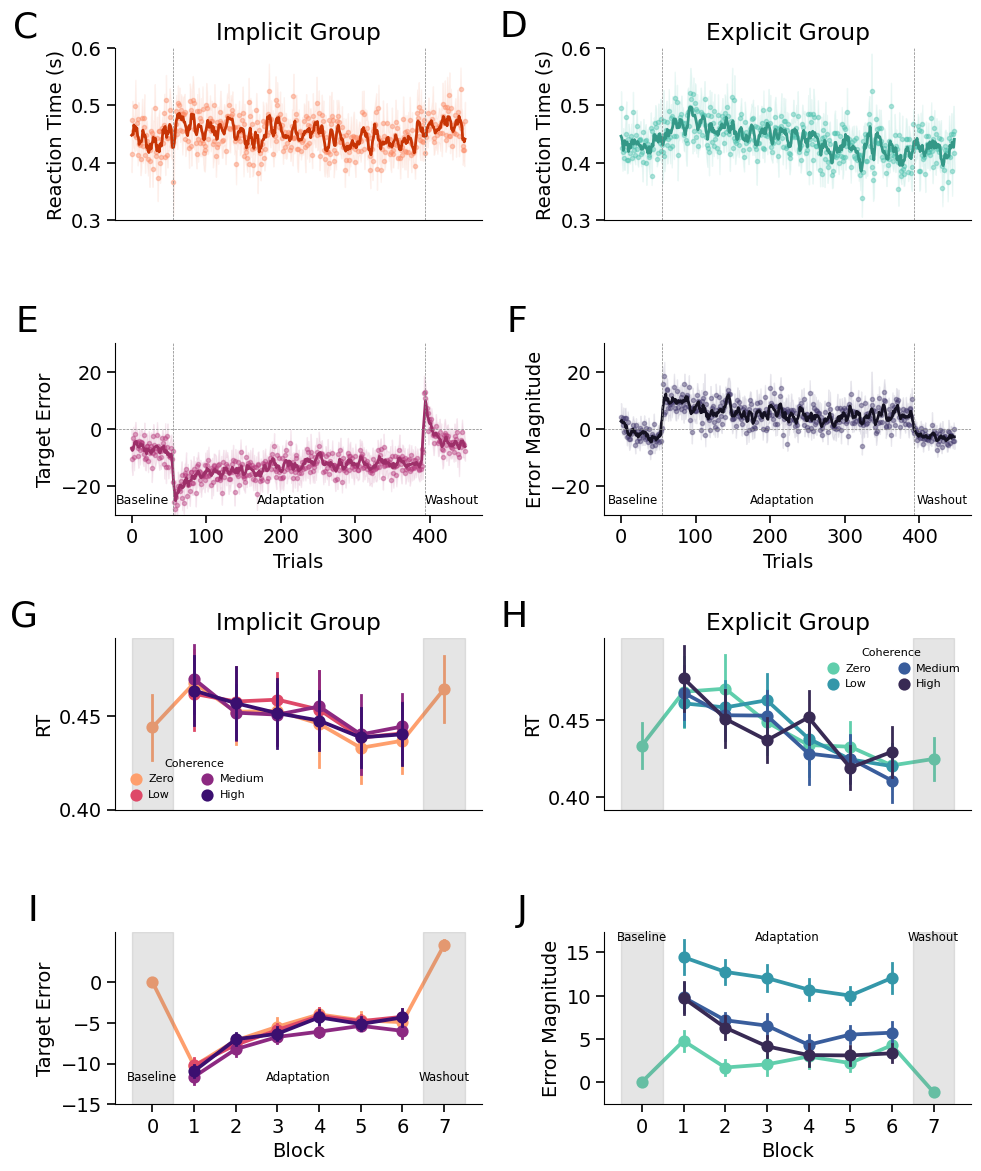

In [14]:
# Calculate standard error for group 0
implicit_rt_std_err = df_data_implicit_avg_trial.groupby(['block', 'trial'])['reach_rt'].sem().values
implicit_vis_err_std_err = df_data_implicit_avg_trial.groupby(['block', 'trial'])['reach_vis_err_corrected'].sem().values

# Calculate standard error for group 1
explicit_rt_std_err = df_data_explicit_avg_trial.groupby(['block', 'trial'])['reach_rt'].sem().values
explicit_vis_err_std_err = df_data_explicit_avg_trial.groupby(['block', 'trial'])['reach_vis_abs_err_corrected'].sem().values

# Define color palettes
palette0 = sns.color_palette("magma_r", 3)
palette1 = sns.color_palette("mako_r", 3)

# Function to compute centered moving average
def moving_average(data, window_size=10):
    if window_size % 2 == 0:
        window_size += 1
    
    half_window = window_size // 2
    smoothed_data = []
    
    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        
        window_values = data[window_start:window_end]
        
        smoothed_data.append(np.mean(window_values))
        
    return np.array(smoothed_data)

# Window size for moving average
window_size = 5  # Making it odd for proper centering

# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

# Plot behavior for group 0 (Reaction Times)
axes[0, 0].plot(df_data_implicit_avg_trial_trial_new["trial_idx"], 
                df_data_implicit_avg_trial_trial_new["reach_rt"], 
                marker='o', linestyle='', color=palette0[0], markersize=3, alpha=0.4)
axes[0, 0].fill_between(df_data_implicit_avg_trial_trial_new["trial_idx"], 
                        df_data_implicit_avg_trial_trial_new["reach_rt"] - implicit_rt_std_err, 
                        df_data_implicit_avg_trial_trial_new["reach_rt"] + implicit_rt_std_err, 
                        color=palette0[0], alpha=0.1)

# Add centered moving average for group 0 (Reaction Times)
ma_x = df_data_implicit_avg_trial_trial_new["trial_idx"]
ma_y = moving_average(df_data_implicit_avg_trial_trial_new["reach_rt"], window_size)
# Use a darker version of the same color for the moving average line
axes[0, 0].plot(ma_x, ma_y, color=sns.set_hls_values(palette0[0], l=0.4), linewidth=2)

axes[0, 0].set_ylim(0.3, 0.6)
axes[0, 0].set_xlabel("Trials")
axes[0, 0].set_ylabel("Reaction Time (s)")
axes[0, 0].set_title("Implicit Group")
axes[0, 0].axvline(55, linestyle='--', color='gray', linewidth=0.5)
axes[0, 0].axvline(len(df_data_explicit_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth=0.5)
axes[0, 0].set_xlabel('')
axes[0, 0].set_xticks([])
add_subplot_label(axes[0,0], 'C', x=-.21, y=1.225)

# Plot behavior for group 1 (Reaction Times)
axes[0, 1].plot(df_data_explicit_avg_trial_trial_new["trial_idx"], 
                df_data_explicit_avg_trial_trial_new["reach_rt"], 
                marker='o', linestyle='', color=palette1[0], markersize=3, alpha=0.4)
axes[0, 1].fill_between(df_data_explicit_avg_trial_trial_new["trial_idx"], 
                        df_data_explicit_avg_trial_trial_new["reach_rt"] - explicit_rt_std_err, 
                        df_data_explicit_avg_trial_trial_new["reach_rt"] + explicit_rt_std_err, 
                        color=palette1[0], alpha=0.1)

# Add centered moving average for group 1 (Reaction Times)
ma_x = df_data_explicit_avg_trial_trial_new["trial_idx"]
ma_y = moving_average(df_data_explicit_avg_trial_trial_new["reach_rt"], window_size)
# Use a darker version of the same color for the moving average line
axes[0, 1].plot(ma_x, ma_y, color=sns.set_hls_values(palette1[0], l=0.4), linewidth=2)

axes[0, 1].set_ylim(0.3, 0.6)
axes[0, 1].set_xlabel("Trials")
axes[0, 1].set_ylabel("Reaction Time (s)")
axes[0, 1].set_title("Explicit Group")
axes[0, 1].axvline(55, linestyle='--', color='gray', linewidth=0.5)
axes[0, 1].axvline(len(df_data_explicit_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth=0.5)
axes[0, 1].set_xlabel('')
axes[0, 1].set_xticks([])
add_subplot_label(axes[0,1], 'D', x=-.21, y=1.225)

# Plot behavior for group 0 (Error Magnitude)
axes[1, 0].plot(df_data_implicit_avg_trial_trial_new["trial_idx"], 
                df_data_implicit_avg_trial_trial_new["reach_vis_err_corrected"], 
                marker='o', linestyle='', color=palette0[1], markersize=3, alpha=0.4)
axes[1, 0].fill_between(df_data_explicit_avg_trial_trial_new["trial_idx"], 
                        df_data_implicit_avg_trial_trial_new["reach_vis_err_corrected"] - implicit_vis_err_std_err, 
                        df_data_implicit_avg_trial_trial_new["reach_vis_err_corrected"] + implicit_vis_err_std_err, 
                        color=palette0[1], alpha=0.1)

# Add centered moving average for group 0 (Error Magnitude)
ma_x = df_data_implicit_avg_trial_trial_new["trial_idx"]
ma_y = moving_average(df_data_implicit_avg_trial_trial_new["reach_vis_err_corrected"], window_size)
# Use a darker version of the same color for the moving average line
axes[1, 0].plot(ma_x, ma_y, color=sns.set_hls_values(palette0[1], l=0.4), linewidth=2)

axes[1, 0].set_ylim(-30, 30)
axes[1, 0].set_xlabel("Trials")
axes[1, 0].set_ylabel("Target Error")
axes[1, 0].axhline(0, linestyle='--', color='gray', linewidth=0.5)
axes[1, 0].axvline(55, linestyle='--', color='gray', linewidth=0.5)
axes[1, 0].axvline(len(df_data_explicit_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth=0.5)

# add text boxes
axes[1, 0].text(50, -27, "Baseline", fontsize=9, ha='right', va='bottom')
axes[1, 0].text(260, -27, "Adaptation", fontsize=9, ha='right', va='bottom')
axes[1, 0].text(465, -27, "Washout", fontsize=9, ha='right', va='bottom')
add_subplot_label(axes[1,0], 'E', x=-.21, y=1.225)

# Plot behavior for group 1 (Error Magnitude)
axes[1, 1].plot(df_data_explicit_avg_trial_trial_new["trial_idx"], 
                df_data_explicit_avg_trial_trial_new["reach_vis_abs_err_corrected"], 
                marker='o', linestyle='', color=palette1[2], markersize=3, alpha=0.4)
axes[1, 1].fill_between(df_data_explicit_avg_trial_trial_new["trial_idx"], 
                        df_data_explicit_avg_trial_trial_new["reach_vis_abs_err_corrected"] - explicit_vis_err_std_err, 
                        df_data_explicit_avg_trial_trial_new["reach_vis_abs_err_corrected"] + explicit_vis_err_std_err, 
                        color=palette1[2], alpha=0.1)

# Add centered moving average for group 1 (Error Magnitude)
ma_x = df_data_explicit_avg_trial_trial_new["trial_idx"]
ma_y = moving_average(df_data_explicit_avg_trial_trial_new["reach_vis_abs_err_corrected"], window_size)
# Use a darker version of the same color for the moving average line
axes[1, 1].plot(ma_x, ma_y, color=sns.set_hls_values(palette1[2], l=0.1), linewidth=2)

axes[1, 1].set_ylim(-30, 30)
axes[1, 1].set_xlabel("Trials")
axes[1, 1].set_ylabel("Error Magnitude")
axes[1, 1].axhline(0, linestyle='--', color='gray', linewidth=0.5)
axes[1, 1].axvline(55, linestyle='--', color='gray', linewidth=0.5)
axes[1, 1].axvline(len(df_data_explicit_avg_trial_trial_new["trial_idx"]) - 55, linestyle='--', color='gray', linewidth=0.5)

# add text boxes
axes[1, 1].text(50, -27, "Baseline", fontsize=8.5, ha='right', va='bottom')
axes[1, 1].text(260, -27, "Adaptation", fontsize=8.5, ha='right', va='bottom')
axes[1, 1].text(465, -27, "Washout", fontsize=8.5, ha='right', va='bottom')
add_subplot_label(axes[1,1], 'F', x=-.21, y=1.225)

# Define custom palette order
palette_magma = sns.color_palette("magma_r", 4)
palette_mako = sns.color_palette("mako_r", 4)

# Plot behavior for group 0 (RTs) with Magma palette
g0 = sns.pointplot(x="block", y="reach_rt", hue="coh_cat", data=df_data_implicit_avg, errorbar="se", ax=axes[2, 0], palette=palette_magma, errwidth=2)
axes[2, 0].set_xlabel("")
axes[2, 0].set_yticks(np.arange(0.40, 0.5, .05))
axes[2, 0].set_ylabel("RT")
axes[2, 0].set_title("Implicit Group")
# remove x ticks
axes[2, 0].set_xticks([])
# Custom legend with specific labels
handles, _ = axes[2, 0].get_legend_handles_labels()
axes[2, 0].legend(handles, ["Zero", "Low", "Medium", "High"], loc='lower left', title="Coherence", ncols=2, fontsize=8, title_fontsize=8)
# Add shaded boxes
axes[2, 0].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[2, 0].axvspan(6.5, 7.5, color='gray', alpha=0.2)
add_subplot_label(axes[2,0], 'G', x=-.21, y=1.225)

# Plot behavior for group 1 (RTs)
g1 = sns.pointplot(x="block", y="reach_rt", hue="coh_cat", data=df_data_explicit_avg, errorbar="se", ax=axes[2, 1], palette=palette_mako, errwidth=2)
axes[2, 1].set_xlabel("")
axes[2, 1].set_ylabel("RT")
axes[2, 1].set_yticks(np.arange(0.40, 0.5, .05))
axes[2, 1].set_title("Explicit Group")
axes[2, 1].set_xticks([])
# Custom legend with specific labels
handles, _ = axes[2, 1].get_legend_handles_labels()
axes[2, 1].legend(handles, ["Zero", "Low", "Medium", "High"], loc='upper right', title="Coherence", ncols=2, fontsize=8, title_fontsize=8)
# Add shaded boxes
axes[2, 1].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[2, 1].axvspan(6.5, 7.5, color='gray', alpha=0.2)
add_subplot_label(axes[2,1], 'H', x=-.21, y=1.225)

# Plot behavior for group 0 (Errors)
sns.pointplot(x="block", y="reach_vis_err_corrected", hue="coh_cat", data=df_data_implicit_avg, errorbar="se", ax=axes[3, 0], palette=palette_magma, errwidth=2)
axes[3, 0].set_xlabel("Block")
axes[3, 0].set_yticks(np.arange(-15, 1, 5))
axes[3, 0].set_ylabel("Target Error")
# Add shaded boxes
axes[3, 0].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[3, 0].axvspan(6.5, 7.5, color='gray', alpha=0.2)
axes[3, 0].text(0, -12.5, "Baseline", fontsize=8.5, ha='center', va='bottom')
axes[3, 0].text(3.5, -12.5, "Adaptation", fontsize=8.5, ha='center', va='bottom')
axes[3, 0].text(7, -12.5, "Washout", fontsize=8.5, ha='center', va='bottom')
add_subplot_label(axes[3,0], 'I', x=-.21, y=1.225)

# Plot behavior for group 1 (Errors)
sns.pointplot(x="block", y="reach_vis_abs_err_corrected", hue="coh_cat", data=df_data_explicit_avg, errorbar="se", ax=axes[3, 1], palette=palette_mako, errwidth=2)
axes[3, 1].set_yticks(np.arange(0, 20, 5))
axes[3, 1].set_xlabel("Block")
axes[3, 1].set_ylabel("Error Magnitude")
# Remove the legends
axes[3, 0].get_legend().remove()
axes[3, 1].get_legend().remove()
# Add shaded boxes
axes[3, 1].axvspan(-0.5, 0.5, color='gray', alpha=0.2)
axes[3, 1].axvspan(6.5, 7.5, color='gray', alpha=0.2)
axes[3, 1].text(0, 16, "Baseline", fontsize=8.5, ha='center', va='bottom')
axes[3, 1].text(3.5, 16, "Adaptation", fontsize=8.5, ha='center', va='bottom')
axes[3, 1].text(7, 16, "Washout", fontsize=8.5, ha='center', va='bottom')
add_subplot_label(axes[3,1], 'J', x=-.21, y=1.225)

# Adjust the spacing between subplots
plt.tight_layout()

# save the figure in pdf
plt.savefig(r'./figures/fig_01_behav.pdf', format='pdf', bbox_inches='tight', dpi=600)

# Show the combined plot
# plt.show()